In [1247]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [1248]:
# loadind the data
train = pd.read_csv('C:\\Users\\lenovo\\Desktop\\Stat\\Challenge\\train_qnU1GcL.csv')

In [1249]:
test = pd.read_csv('C:\\Users\\lenovo\\Desktop\\Stat\\Challenge\\test_LxCaReE_DvdCKVT2_7rMflxW_O46whsi.csv')

In [1250]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [1251]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [1252]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [1253]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

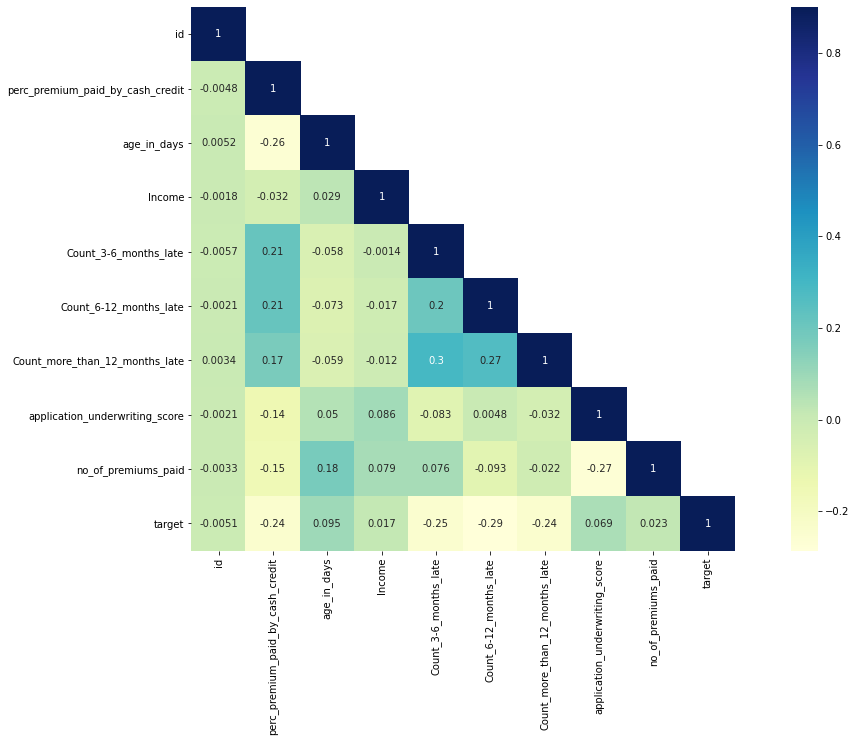

In [1254]:
# looking at the correlation between numerical variables
corr = train[['id','perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [1255]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


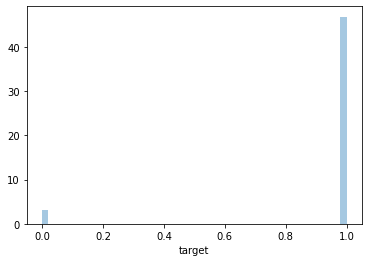

In [1256]:
# distribution of count variable
sn.distplot(train["target"])

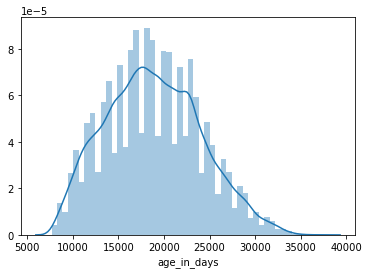

In [1257]:
sn.distplot(train["age_in_days"])

In [1258]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [1259]:
train.fillna(0,inplace=True)

In [1260]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [1261]:
test.fillna(0,inplace=True)

In [1262]:
from sklearn.linear_model import LogisticRegression

In [1263]:
# initialize the linear regression model
logreg = LogisticRegression()

In [1264]:
train=train.drop('sourcing_channel',1)

In [1265]:
X_train =train[train['age_in_days']<=27000]
validation = train[train['age_in_days']>27000]

In [1266]:
X_train = train.drop('target',1)
y_train = train['target']
X_val = validation.drop('target',1)
y_val = validation['target']

In [1267]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((79853, 10), (79853,), (5785, 10), (5785,))

In [1268]:
X_train=pd.get_dummies(X_train)
X_val=pd.get_dummies(X_val)

In [1269]:
# fitting the model on X_train and y_train
logreg.fit(X_train,y_train)


LogisticRegression()

In [1270]:
# making prediction on validation set
prediction = logreg.predict(X_val)

In [1271]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [1272]:
rmsle(y_val,prediction)

0.1074437554091766

In [1273]:
logreg.score(X_train,y_train)

0.937409990858202

In [1274]:
logreg.score(X_val,y_val)

0.975972342264477

In [1275]:
from sklearn.tree import DecisionTreeRegressor

In [1276]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor( max_depth=7,min_samples_leaf=4)

In [1277]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4)

In [1278]:
predict = dt_reg.predict(X_val)

In [1279]:
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.09744455653154947

In [1280]:
test=test.drop('sourcing_channel',1)

In [1281]:
test=pd.get_dummies(test)

In [1282]:
test_prediction = dt_reg.predict(test)

In [1283]:
new6 = pd.DataFrame()

In [1284]:
# creating a count column and saving the predictions in it 
new6['target'] = test_prediction

In [1285]:
new6.to_csv('new6.csv', header=True, index=False)

In [1286]:
dt_reg.score(X_train, y_train)

0.19554918962662993

In [1287]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val,predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8199559374816832